<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'>INF-391 Reconocimiento de patrones </h1>

<H3 align='center'> Tarea 1  </H3>
<H3 align='center'> Jorge Contreras Cabreras 2015735  </H3>
<H3 align='center'> César Quiroz Mansilla 201573578-6  </H3>
<H3 align='center'> Estebal Tapia Manzano 201573511-5  </H3>
<hr style="height:2px;border:none"/>

# Parte I
### Lectura y Análisis de datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Ocupamos la librería pandas para leer los tres dataset que se trabajarán en el laboratorio. Para ello, ocupamos la función read_csv a la cual le indicamos el archivo txt a leer, el nombre de las columnas que corresponden a las coordenadas x e y, y la separación para que la libreria sepa hasta cuando leer en cada columna.

In [2]:
column_names = ["x","y"]
mouse = pd.read_csv("mouse.txt", names=column_names, sep ="\t")
smile = pd.read_csv("smile.txt", names=column_names, sep ="\t")
spiral = pd.read_csv("spiral.txt", names=column_names, sep ="\t")

In [3]:
print("Dataset mouse\n",mouse.head(5),"\nShape:",mouse.shape,"\n")
print("Dataset smile\n",smile.head(5),"\nShape",smile.shape,"\n")
print("Dataset spiral\n",spiral.head(5),"\nShape",spiral.shape,"\n")

Dataset mouse
           x         y
0  0.456601  0.432806
1  0.611378  0.528625
2  0.450299  0.711606
3  0.639015  0.460744
4  0.628957  0.323470 
Shape: (500, 2) 

Dataset smile
           x         y
0 -0.303573  0.722940
1 -0.288011  0.692245
2 -0.306319  0.708402
3 -0.304490  0.714163
4 -0.288526  0.693369 
Shape (1000, 2) 

Dataset spiral
        x     y
0  31.95  7.95
1  31.15  7.30
2  30.45  6.65
3  29.70  6.00
4  28.90  5.55 
Shape (312, 2) 



Los datos que entrega la cabecera de cada dataframe son efectivamente los valores que se encuentran en los txt, sin embargo, es posible observar que para el dataset mouse, hay un truncamiento de decimales, ya que no presenta la misma cantidad de cifras significativas que se encuentran en el txt. Sin embargo, al evaluar cada valor perteneciente al datafrase, obtenemos:

In [4]:
print("x0: ",mouse["x"][0], "y0: ",mouse["y"][0])
print("x1: ",mouse["x"][1], "y1: ",mouse["y"][1])

x0:  0.456601376346254 y0:  0.43280640922410796
x1:  0.611378467222419 y1:  0.528624598889498


Por lo cual, lo anterior se debía solo a una apreciación visual que entrega python, en el procesador los valores numéricos serán exactamente iguales a los pertenecientes al txt.

Como los datos corresponden a coordenadas de un plano cartesiano, la mejor forma de evidenciar la correcta lectura de estos es mostrarlos gráficamente, en vez de mostrar solo una serie de números decimales, por lo cual, a través de la librería matplotlib se hace un scatter plot de cada dataset.

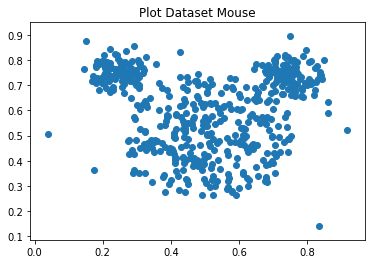

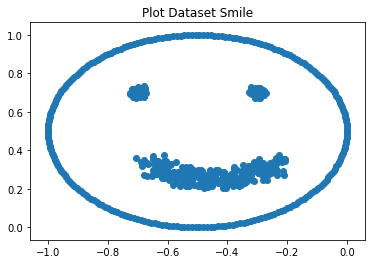

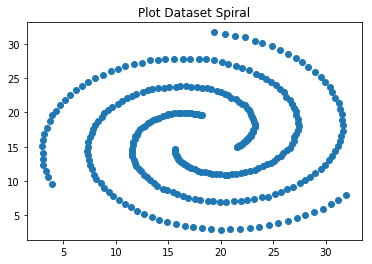

In [5]:
plt.scatter(mouse["x"], mouse["y"])
plt.title("Plot Dataset Mouse")
plt.show()

plt.scatter(smile["x"], smile["y"])
plt.title("Plot Dataset Smile")
plt.show()

plt.scatter(spiral["x"], spiral["y"])
plt.title("Plot Dataset Spiral")
plt.show()

El gráfico de los datos da el resultado esperado, y ya se tiene una noción de como se distribuyen en efectos prácticos, por lo cual, procedemos a trabajar con los algoritmos de clustering.

### Algoritmos


Para el trabajo con los algoritmos de clustering, vamos a ocupar la librería de machine learning para python scikit-learn. Y vamos a llevar los datos de cada pandas dataframe a una lista 2d.

In [93]:
mouse_xy = []; smile_xy = []; spiral_xy = []
for index, row in mouse.iterrows():
    mouse_xy.append([row.x,row.y])
for index, row in smile.iterrows():
    smile_xy.append([row.x,row.y])
for index, row in spiral.iterrows():
    spiral_xy.append([row.x,row.y])
mouse_xy=np.array(mouse_xy)
smile_xy=np.array(smile_xy)
spiral_xy=np.array(spiral_xy)

#### K-Means

Es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano

##### Data ser mouse.txt

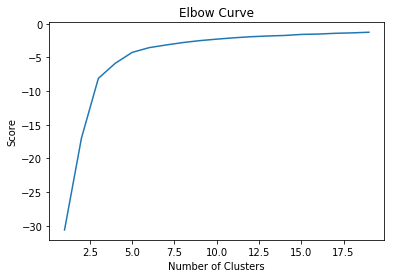

In [7]:
from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(mouse_xy).score(mouse_xy) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

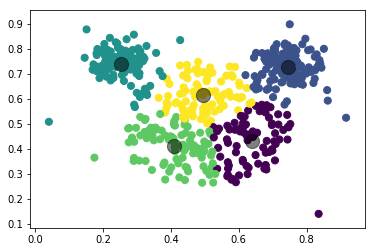

In [8]:
kmeans = KMeans(n_clusters=5).fit(mouse_xy)
centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(mouse_xy)
colores=['red','green','blue','cyan','yellow']
plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

##### Data set smile.txt

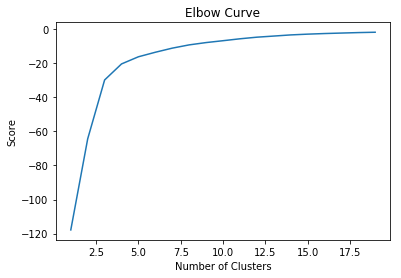

In [9]:
Nc = range(1, 20)
kmeans2 = [KMeans(n_clusters=i) for i in Nc]
kmeans2
score2 = [kmeans2[i].fit(smile_xy).score(smile_xy) for i in range(len(kmeans2))]
score2
plt.plot(Nc,score2)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

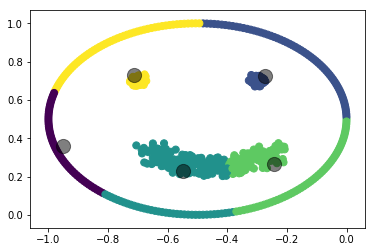

In [10]:
kmeans2 = KMeans(n_clusters=5).fit(smile_xy)
centers2 = kmeans2.cluster_centers_
y_kmeans2 = kmeans2.predict(smile_xy)
colores=['red','green','blue','cyan','yellow']
plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=y_kmeans2, s=50, cmap='viridis')
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5);

##### Data set spiral.txt

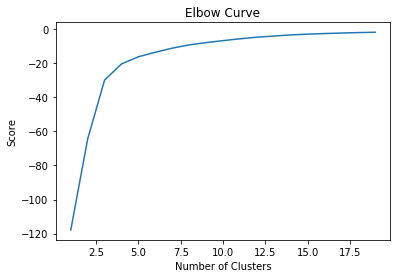

In [11]:
Nc = range(1, 20)
kmeans3 = [KMeans(n_clusters=i) for i in Nc]
kmeans3
score3 = [kmeans3[i].fit(smile_xy).score(smile_xy) for i in range(len(kmeans3))]
score3
plt.plot(Nc,score3)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

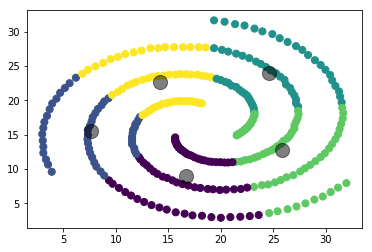

In [12]:
kmeans3 = KMeans(n_clusters=5).fit(spiral_xy)
centers3 = kmeans3.cluster_centers_
y_kmeans3 = kmeans3.predict(spiral_xy)
colores=['red','green','blue','cyan','yellow']
plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=y_kmeans3, s=50, cmap='viridis')
plt.scatter(centers3[:, 0], centers3[:, 1], c='black', s=200, alpha=0.5);

#### Agglomerative Hierarchical Clustering:

##### a) complete link

###### Data set mouse.txt

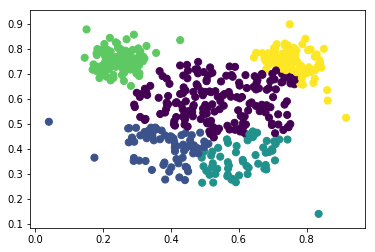

In [13]:
from sklearn.cluster import AgglomerativeClustering
complete_link = AgglomerativeClustering(n_clusters=5, linkage = "complete").fit(mouse_xy)
y_complete_link = complete_link.fit_predict(mouse_xy)
colores=['red','green','blue','cyan','yellow']
plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=y_complete_link, s=50, cmap='viridis')
plt.show()

##### Data set smile.txt

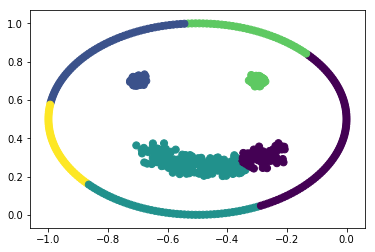

In [14]:
complete_link2 = AgglomerativeClustering(n_clusters=5, linkage = "complete").fit(smile_xy)
y_complete_link2 = complete_link2.fit_predict(smile_xy)
plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=y_complete_link2, s=50, cmap='viridis')
plt.show()

##### Data set spiral.txt

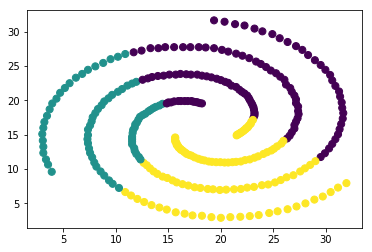

In [15]:
complete_link3 = AgglomerativeClustering(n_clusters=3, linkage = "complete").fit(spiral_xy)
y_complete_link3 = complete_link3.fit_predict(spiral_xy)
plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=y_complete_link3, s=50, cmap='viridis')
plt.show()

##### b) single link

##### Data set mouse.txt

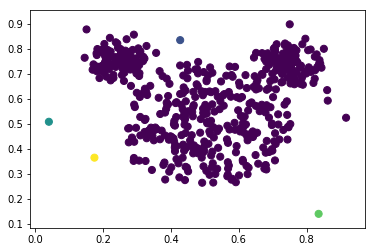

In [16]:
single_link = AgglomerativeClustering(n_clusters=5, linkage = "single").fit(mouse_xy)
y_single_link = single_link.fit_predict(mouse_xy)
plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=y_single_link, s=50, cmap='viridis')
plt.show()

##### Data set smile.txt

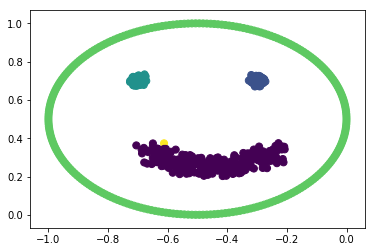

In [17]:
single_link2 = AgglomerativeClustering(n_clusters=5, linkage = "single").fit(smile_xy)
y_single_link2 = single_link2.fit_predict(smile_xy)
plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=y_single_link2, s=50, cmap='viridis')
plt.show()

##### Data set spiral.txt

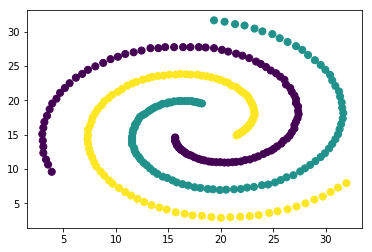

In [18]:
single_link3 = AgglomerativeClustering(n_clusters=3, linkage = "single").fit(spiral_xy)
y_single_link3 = single_link3.fit_predict(spiral_xy)
plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=y_single_link3, s=50, cmap='viridis')
plt.show()

#### DBSCAN

##### Data set mouse.txt

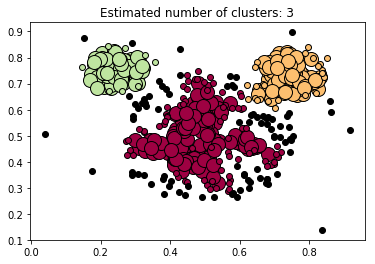

In [19]:
from sklearn.cluster import DBSCAN

# Compute DBSCAN
db = DBSCAN(eps=0.05, min_samples=13).fit(mouse_xy)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = mouse_xy[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = mouse_xy[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

##### Data sert Smile.txt

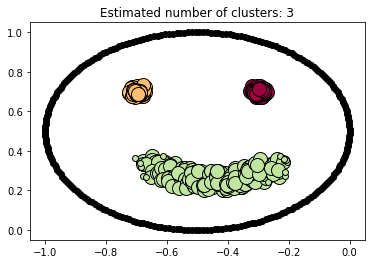

In [20]:
# Compute DBSCAN
db = DBSCAN(eps=0.05, min_samples=13).fit(smile_xy)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = smile_xy[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = smile_xy[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

##### DAta set spiral.txt

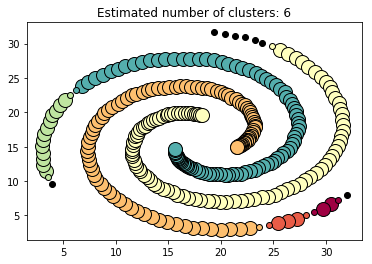

In [21]:
from sklearn.cluster import DBSCAN

# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=3).fit(spiral_xy)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = spiral_xy[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = spiral_xy[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### Mean-shift

##### Data set mouse.txt

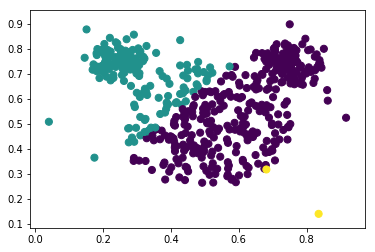

In [22]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift().fit(mouse_xy)
y_mean_shift = mean_shift.fit_predict(mouse_xy)
plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=y_mean_shift, s=50, cmap='viridis')
plt.show()

##### Data set smile.txt

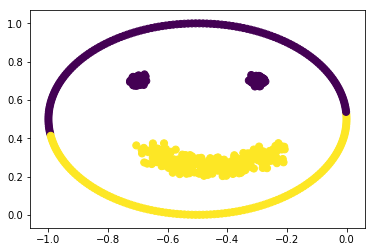

In [23]:
mean_shift2 = MeanShift().fit(smile_xy)
y_mean_shift2 = mean_shift2.fit_predict(smile_xy)
plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=y_mean_shift2, s=50, cmap='viridis')
plt.show()

##### Data set spiral.txt

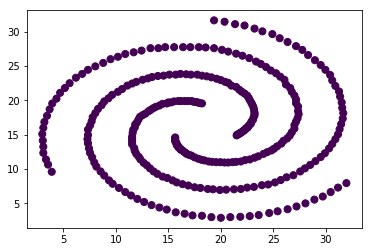

In [24]:
mean_shift3 = MeanShift().fit(spiral_xy)
y_mean_shift3 = mean_shift3.fit_predict(spiral_xy)
plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=y_mean_shift3, s=50, cmap='viridis')
plt.show()

#### Spectral clustering

##### Data set mouse.txt

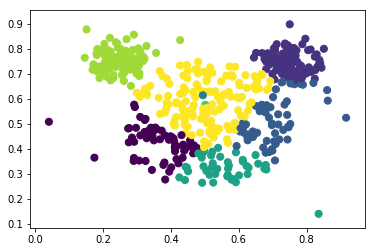

In [25]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering().fit(mouse_xy)
y_spectral = spectral_clustering.fit_predict(mouse_xy)
plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=y_spectral, s=50, cmap='viridis')
plt.show()


##### Data set smile.txt

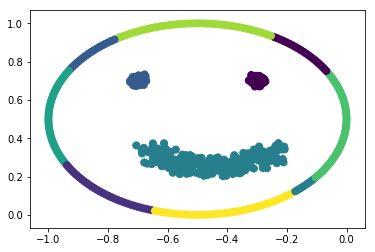

In [26]:
spectral_clustering = SpectralClustering().fit(smile_xy)
y_spectral = spectral_clustering.fit_predict(smile_xy)
plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=y_spectral, s=50, cmap='viridis')
plt.show()

##### Data set spiral.txt

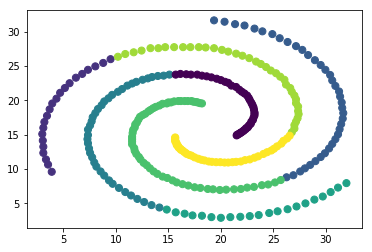

In [27]:
spectral_clustering = SpectralClustering().fit(spiral_xy)
y_spectral = spectral_clustering.fit_predict(spiral_xy)
plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=y_spectral, s=50, cmap='viridis')
plt.show()

#### Fuzzy C-Means


+ *conda install -c conda-forge scikit-fuzzy*

+ *conda install -c conda-forge/label/gcc7 scikit-fuzzy*

+ *conda install -c conda-forge/label/cf201901 scikit-fuzzy* 


##### Data set mouse.txt


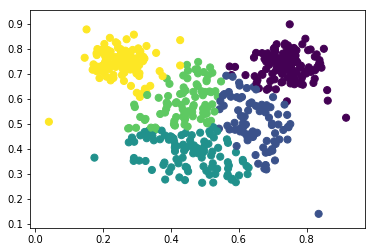

In [101]:
import skfuzzy.cluster as fuzzy

data=mouse_xy.transpose()
cntr, u, u0, d, jm, p, fpc=fuzzy.cmeans(data,5,5, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(u, axis=0)
cluster_membership
mouse_xy
plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=cluster_membership, s=50, cmap='viridis')

plt.show()

##### Data set Smile.txt

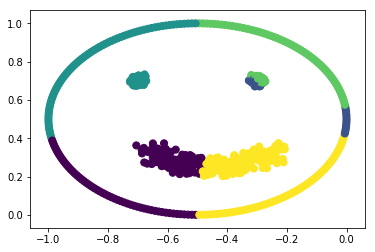

In [102]:
data=smile_xy.transpose()
cntr, u, u0, d, jm, p, fpc=fuzzy.cmeans(data,5,5, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(u, axis=0)
cluster_membership
plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=cluster_membership, s=50, cmap='viridis')

plt.show()

##### Data set spiral.txt

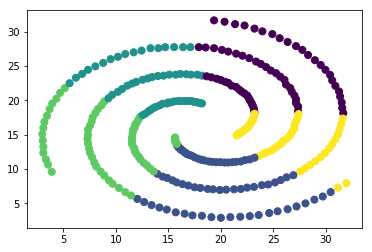

In [103]:
data=spiral_xy.transpose()
cntr, u, u0, d, jm, p, fpc=fuzzy.cmeans(data,5,5, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(u, axis=0)
cluster_membership
plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=cluster_membership, s=50, cmap='viridis')

plt.show()

# Parte 2

### Pregunta a

Se tiene un conjunto de datos con 100 objetos. Se le pide realizar clustering utilizando
K-means, pero para todos los valores de k, 1 ≤ k ≤ 100, el algoritmo retorna que todos los
clusters estan vacíos, excepto uno. ¿En que situación podría ocurrir esto? (analice los datos
y no los parametros del algoritmo, i.e., iteraciones). ¿Qué resultado tendría single-link y
DBSCAN para este tipo de datos?

### Pregunta b

Considerando single-link y complete-link hierarchical clustering, ¿es posible que un
objeto este más cerca (en distancia Euclidiana) de los objetos de otros clusters en relación a ´
los de su propio cluster? Si fuese posible, ¿en que enfoque (single y/o complete) esto podr ´ ´ıa
ocurrir? Justifique con un ejemplo en cada caso.

